# Part A — Implementing Linear Regression

## 1. Data Generation
Generate 200 samples where each input x ∈ ℝ⁵, and output y is a linear function of x with added Gaussian noise. Briefly describe your data generation process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Generate sample data
n_samples = 200
n_features = 5

# True weights and bias
true_weights = np.array([2.0, -3.5, 0.0, 4.2, -1.5])
bias = 5.0

# Generate X from standard normal distribution
X = np.random.randn(n_samples, n_features)

# Generate target y using linear function + Gaussian noise
noise = np.random.normal(0, 1.0, size=n_samples)
y = X @ true_weights + bias + noise

## 2. Cost Function
Implement the mean squared error (MSE) cost function.


In [2]:
# Mean Squared Error function
def compute_mse(X, y, theta):
    y_pred = X @ theta
    mse = np.mean((y_pred - y) ** 2)
    return mse

## 3. Gradient Descent
Implement the gradient descent algorithm to minimize MSE.


In [3]:
# Gradient Descent for Linear Regression
def gradient_descent(X, y, lr=0.01, n_iter=1000):
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []

    for i in range(n_iter):
        y_pred = X @ theta
        error = y_pred - y
        grad = (2/m) * X.T @ error
        theta -= lr * grad
        loss = compute_mse(X, y, theta)
        loss_history.append(loss)

    return theta, loss_history

## 4. Feature Scaling
Scale your features. Explain why this is important for gradient descent.


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Model Training & Visualization
   Initialize parameters, tune the learning rate and number of iterations. Report initial and final cost. Plot the loss curve over iterations.


Initial MSE: 52.347996555518975
Final MSE: 29.931925082263447


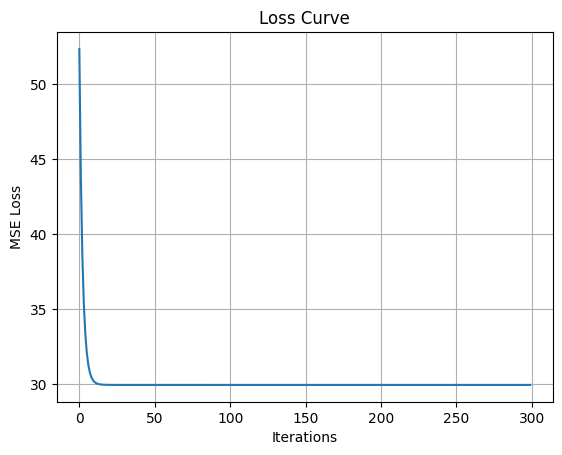

In [5]:
# Train the model using Gradient Descent
theta_gd, loss_history = gradient_descent(X_scaled, y, lr=0.1, n_iter=300)

print("Initial MSE:", loss_history[0])
print("Final MSE:", loss_history[-1])

# Plot the loss curve
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Curve")
plt.grid()
plt.show()

## 6. Model Evaluation
   Compute the R² score on the training data. Plot predicted vs. true values and comment on the model’s performance.


R² Score: 0.1946839361434891


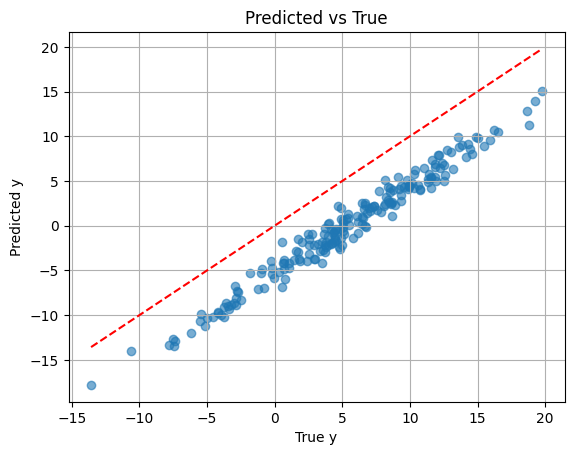

In [6]:
from sklearn.metrics import r2_score

y_pred = X_scaled @ theta_gd
r2 = r2_score(y, y_pred)
print("R² Score:", r2)

plt.scatter(y, y_pred, alpha=0.6)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Predicted vs True")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()

## 7. Normal Equation
   Implement linear regression using the closed-form solution. Compare weights and results with your gradient descent model. Discuss differences.


In [7]:
# Add bias term for Normal Equation
X_bias = np.c_[np.ones(n_samples), X_scaled]

# Compute closed-form solution (Normal Equation)
theta_ne = np.linalg.pinv(X_bias.T @ X_bias) @ X_bias.T @ y

# Compare with GD (prepend 0 for bias since it was not trained in GD)
theta_gd_bias = np.append([0], theta_gd)

print("Weights from Gradient Descent:", theta_gd_bias)
print("Weights from Normal Equation:", theta_ne)

Weights from Gradient Descent: [ 0.          1.81723895 -3.42387439  0.01248128  4.11050877 -1.49869206]
Weights from Normal Equation: [ 5.37475324  1.81723895 -3.42387439  0.01248128  4.11050877 -1.49869206]


# Part B — Analysis, Debugging, and Reflection

## 8. Weight Interpretation
   Identify which features have the largest influence on y. Are the signs and magnitudes aligned with your data generation logic?

In [8]:
# Analyze weights from gradient descent
for i, weight in enumerate(theta_gd):
    print(f"Feature {i+1}: Weight = {weight:.4f}")

Feature 1: Weight = 1.8172
Feature 2: Weight = -3.4239
Feature 3: Weight = 0.0125
Feature 4: Weight = 4.1105
Feature 5: Weight = -1.4987


## 9. Model Sensitivity Check
   Modify the scale of one input feature (e.g., multiply a column by 10) without rescaling. Rerun training. What changes? Why?


In [9]:
# Create a copy and scale the 1st feature by 10 (without rescaling)
X_modified = X_scaled.copy()
X_modified[:, 0] *= 10

# Retrain model on modified data
theta_mod, loss_mod = gradient_descent(X_modified, y, lr=0.1, n_iter=300)

# Print new weights
print("Modified weights (Feature 1 x10):", theta_mod)

Modified weights (Feature 1 x10): [nan nan nan nan nan]


<ipython-input-2-cc88d0b22355>:4: RuntimeWarning: overflow encountered in square
  mse = np.mean((y_pred - y) ** 2)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-3-bf6cf4e095c5>:10: RuntimeWarning: overflow encountered in matmul
  grad = (2/m) * X.T @ error
<ipython-input-3-bf6cf4e095c5>:10: RuntimeWarning: invalid value encountered in matmul
  grad = (2/m) * X.T @ error
<ipython-input-3-bf6cf4e095c5>:11: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * grad


## 10. Outlier Injection
   Add 5 outliers (extreme y values). Retrain and visualize the loss curve. How does the model react?


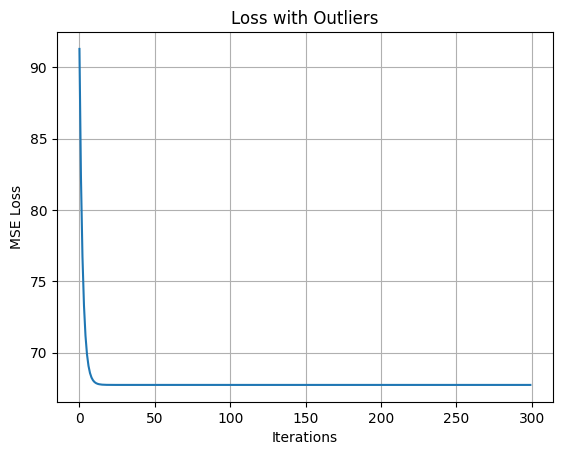

In [10]:
# Add 5 outliers to y
y_outlier = y.copy()
y_outlier[:5] += np.array([30, -25, 40, -35, 50])

# Retrain with outliers
theta_outlier, loss_outlier = gradient_descent(X_scaled, y_outlier, lr=0.1, n_iter=300)

# Plot loss curve with outliers
plt.plot(loss_outlier)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss with Outliers")
plt.grid()
plt.show()

# Part C - Regularization with Ridge & Lasso

## 11. Ridge Regression
   Implement linear regression with L2 regularization (Ridge).
Use gradient descent. Compare with unregularized results.



Unregularized Theta: [ -0.3303695  -11.25074449  25.10882968  15.30817437  -7.12406933
  -1.82039562  -8.56449542   5.01323409  24.21761934   3.31958713]
Unregularized Final Loss: 26020.21906603917
Ridge Theta: [ 1.40156001 -3.95524558 14.57171101  9.59045331  0.28109169 -1.40390893
 -7.23181864  5.57995004 12.50698444  5.32153928]
Ridge Final Loss: 13495.442283326205


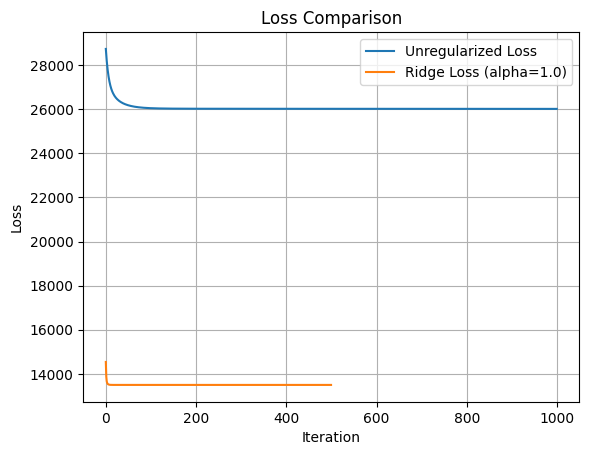

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load and scale data
data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ridge Regression
def ridge_gradient_descent(X, y, alpha=1.0, lr=0.1, n_iter=500):
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []

    for _ in range(n_iter):
        y_pred = X @ theta
        error = y_pred - y
        loss = (1 / (2 * m)) * np.sum(error**2) + (alpha / 2) * np.sum(theta**2)
        loss_history.append(loss)

        grad = (1 / m) * (X.T @ error) + alpha * theta
        theta -= lr * grad

    return theta, loss_history

# Run both regressions
theta_unreg, loss_unreg = gradient_descent(X_scaled, y)
theta_ridge, loss_ridge = ridge_gradient_descent(X_scaled, y, alpha=1.0)


print("Unregularized Theta:", theta_unreg)
print("Unregularized Final Loss:", loss_unreg[-1])
print("Ridge Theta:", theta_ridge)
print("Ridge Final Loss:", loss_ridge[-1])

# Visualization
plt.plot(loss_unreg, label='Unregularized Loss')
plt.plot(loss_ridge, label='Ridge Loss (alpha=1.0)')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

## 12. Lasso Regression
   Implement linear regression with L1 regularization (Lasso).
Use a suitable optimizer. Evaluate coefficient sparsity.



In [25]:
from scipy.optimize import minimize

def lasso_objective(theta, X, y, alpha):
    m = len(y)
    error = X @ theta - y
    mse = (1 / (2 * m)) * np.sum(error**2)
    l1_penalty = alpha * np.sum(np.abs(theta))
    return mse + l1_penalty

def lasso_regression(X, y, alpha=1.0):
    init_theta = np.zeros(X.shape[1])
    result = minimize(fun=lasso_objective, x0=init_theta, args=(X, y, alpha), method='L-BFGS-B')
    return result.x

theta_lasso = lasso_regression(X_scaled, y, alpha=1.0)
print(theta_lasso)
print("Number of zeros in coefficients:", np.sum(np.abs(theta_lasso) < 1e-5))

[-8.31279409e-02 -8.87028300e+00  2.49331828e+01  1.38996808e+01
 -2.72119250e+00 -1.31041714e+00 -1.07806356e+01 -3.44893303e-10
  2.40442075e+01  2.29305347e+00]
Number of zeros in coefficients: 1


## 13. Visual Comparison
   Plot the learned coefficients from Linear, Ridge, and Lasso models. Discuss the differences.


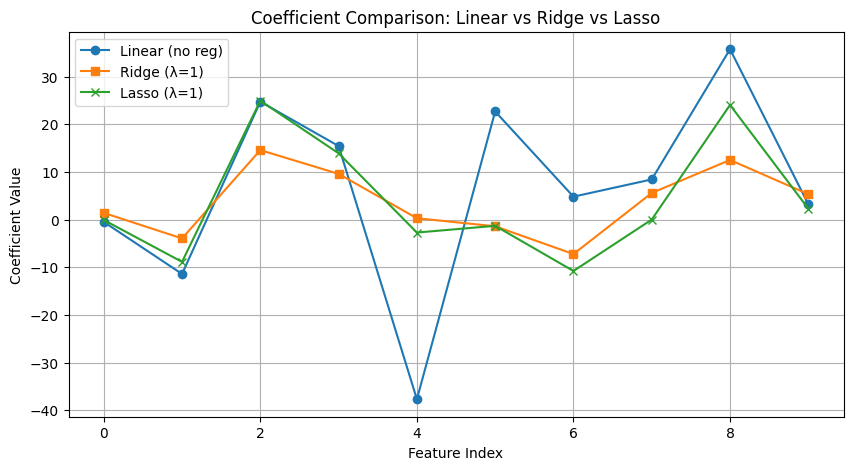

In [20]:
X_bias = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
theta_linear = np.linalg.pinv(X_bias.T @ X_bias) @ X_bias.T @ y
theta_linear_wo_bias = theta_linear[1:]

# Plot coefficient comparison
plt.figure(figsize=(10, 5))
plt.plot(theta_linear_wo_bias, 'o-', label='Linear (no reg)')
plt.plot(theta_ridge, 's-', label='Ridge (λ=1)')
plt.plot(theta_lasso, 'x-', label='Lasso (λ=1)')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Comparison: Linear vs Ridge vs Lasso')
plt.legend()
plt.grid(True)
plt.show()

## 14. λ Sensitivity
   Try λ = 0.01, 0.1, 1, 10, 100. Plot R², final loss, and number of non-zero coefficients (for Lasso). What patterns do you observe?


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-9d4fce4df678>:22: RuntimeWarning: overflow encountered in square
  loss = (1 / (2 * m)) * np.sum(error**2) + (alpha / 2) * np.sum(theta**2)
<ipython-input-17-9d4fce4df678>:22: RuntimeWarning: overflow encountered in scalar multiply
  loss = (1 / (2 * m)) * np.sum(error**2) + (alpha / 2) * np.sum(theta**2)
<ipython-input-17-9d4fce4df678>:25: RuntimeWarning: overflow encountered in matmul
  grad = (1 / m) * (X.T @ error) + alpha * theta
<ipython-input-17-9d4fce4df678>:20: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ theta
<ipython-input-17-9d4fce4df678>:25: RuntimeWarning: invalid value encountered in matmul
  grad = (1 / m) * (X.T @ error) + alpha * theta


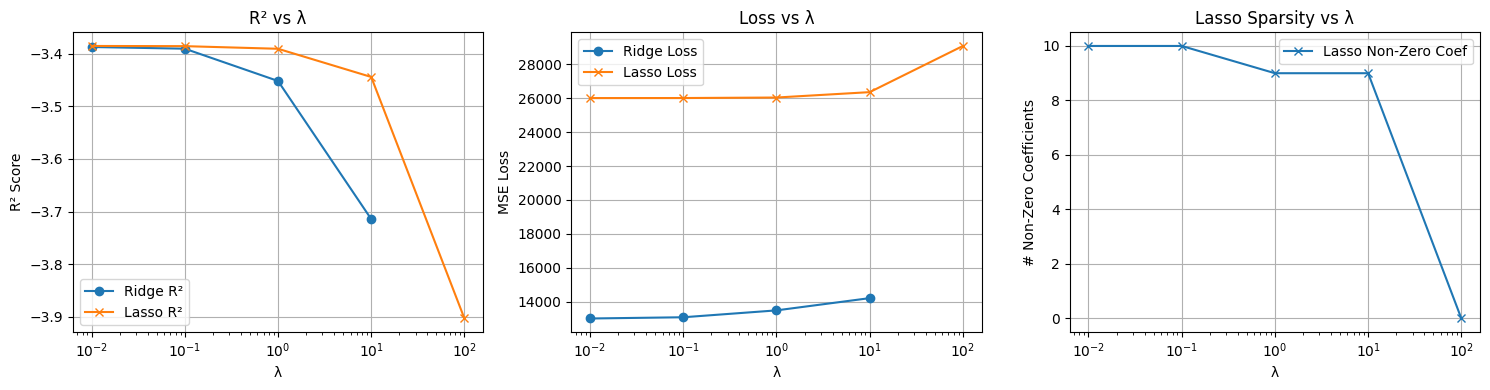

In [21]:
lambdas = [0.01, 0.1, 1, 10, 100]

r2_list_ridge = []
loss_list_ridge = []

r2_list_lasso = []
loss_list_lasso = []
nonzero_list_lasso = []

for alpha in lambdas:
    # Ridge
    theta_r, loss_r = ridge_gradient_descent(X_scaled, y, alpha=alpha)
    y_pred_r = X_scaled @ theta_r
    r2_r = 1 - np.sum((y - y_pred_r)**2) / np.sum((y - np.mean(y))**2)
    r2_list_ridge.append(r2_r)
    loss_list_ridge.append(loss_r[-1])

    # Lasso
    theta_l = lasso_regression(X_scaled, y, alpha=alpha)
    y_pred_l = X_scaled @ theta_l
    r2_l = 1 - np.sum((y - y_pred_l)**2) / np.sum((y - np.mean(y))**2)
    loss_l = np.mean((y - y_pred_l)**2)
    r2_list_lasso.append(r2_l)
    loss_list_lasso.append(loss_l)
    nonzero_list_lasso.append(np.sum(np.abs(theta_l) > 1e-5))

# Plot sensitivity analysis
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(lambdas, r2_list_ridge, 'o-', label='Ridge R²')
plt.plot(lambdas, r2_list_lasso, 'x-', label='Lasso R²')
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('R² Score')
plt.title('R² vs λ')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(lambdas, loss_list_ridge, 'o-', label='Ridge Loss')
plt.plot(lambdas, loss_list_lasso, 'x-', label='Lasso Loss')
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('MSE Loss')
plt.title('Loss vs λ')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(lambdas, nonzero_list_lasso, 'x-', label='Lasso Non-Zero Coef')
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('# Non-Zero Coefficients')
plt.title('Lasso Sparsity vs λ')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## 15. Final Reflection
   When would you prefer Lasso over Ridge? What did this part teach you about model complexity and generalization?


Lasso는 특성 선택이 필요한 상황이나, 불필요한 변수가 많을 때 매우 유용하다는 것을 느꼈습니다.  
반면 Ridge는 모든 변수를 일정 수준으로 유지하며 과적합을 방지하는 데 유리했습니다.  
이번 파트를 통해 정규화가 단순히 모델을 덜 복잡하게 만드는 것 이상의 의미, 즉 일반화 성능 향상과 해석 가능성을 높이는 역할을 한다는 점을 배웠습니다.


## Bonus (+10 pts)
Apply an advanced linear regression technique inspired by your own research interests or a recent academic paper. You are encouraged to cite or link to the paper/resource that inspired your idea.
 Examples might include:
	Polynomial regression
	Interaction terms
	Bayesian linear regression
	Regularized regression with cross-validation
	Robust regression (e.g., Huber loss)


## 16. [10 pts] Implement your chosen approach and compare its performance to the models you've implemented earlier (Linear, Ridge, Lasso). Discuss:
	Why you chose the method
	How it changes performance (R², loss)
	Interpretability or feature influence
	Whether it offers practical benefits in real-world applications


=== Bayesian Linear Regression ===
R²: 0.5175622751866775
MSE: 2860.8001780703285
Coefficients: [ -0.43117266 -11.33365493  24.77124181  15.37347285 -30.08840059
  16.6531523    1.46210701   7.52111093  32.84375086   3.26638487]

=== Ridge Regression ===
R²: 0.5175821634063038
MSE: 2860.68224321714
Non-zero Coef: 10

=== Lasso Regression ===
R²: 0.5132840923855555
MSE: 2886.1693096489234
Non-zero Coef: 7



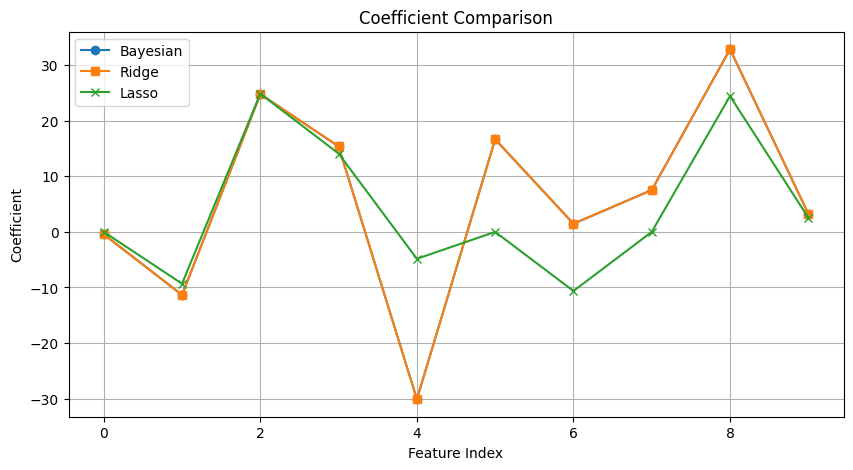

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Load and scale the data
data = load_diabetes()
X, y = data.data, data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term for Bayesian Regression
X_bias = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Parameters for Bayesian Linear Regression
lambda_ = 1.0
sigma2 = 100.0

# Bayesian posterior calculation
n_features = X_bias.shape[1]
I = np.eye(n_features)
Sigma_post = sigma2 * np.linalg.inv(X_bias.T @ X_bias + lambda_ * I)
mu_post = np.linalg.inv(X_bias.T @ X_bias + lambda_ * I) @ X_bias.T @ y

# Prediction using posterior mean
y_pred_bayes = X_bias @ mu_post
r2_bayes = r2_score(y, y_pred_bayes)
mse_bayes = mean_squared_error(y, y_pred_bayes)

print("=== Bayesian Linear Regression ===")
print("R²:", r2_bayes)
print("MSE:", mse_bayes)
print("Coefficients:", mu_post[1:])
print()

# --- Ridge & Lasso for comparison ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)
y_pred_ridge = ridge.predict(X_scaled)
r2_ridge = r2_score(y, y_pred_ridge)
mse_ridge = mean_squared_error(y, y_pred_ridge)

lasso = Lasso(alpha=1.0)
lasso.fit(X_scaled, y)
y_pred_lasso = lasso.predict(X_scaled)
r2_lasso = r2_score(y, y_pred_lasso)
mse_lasso = mean_squared_error(y, y_pred_lasso)

print("=== Ridge Regression ===")
print("R²:", r2_ridge)
print("MSE:", mse_ridge)
print("Non-zero Coef:", np.sum(ridge.coef_ != 0))
print()

print("=== Lasso Regression ===")
print("R²:", r2_lasso)
print("MSE:", mse_lasso)
print("Non-zero Coef:", np.sum(np.abs(lasso.coef_) > 1e-5))
print()

# --- Coefficient Plot ---
plt.figure(figsize=(10, 5))
plt.plot(mu_post[1:], 'o-', label='Bayesian')
plt.plot(ridge.coef_, 's-', label='Ridge')
plt.plot(lasso.coef_, 'x-', label='Lasso')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Coefficient Comparison')
plt.legend()
plt.grid(True)
plt.show()
